# Example Transpilation Workflow
### One-Dimensional Heisenberg Model

As a simple example to demonstrate the workflow of building our own `StagedPassManager`, we will consider the time evolution of a one-dimensional Heisenberg chain, a model typically used in statistical mechanics to study phase transitions of magnetic systems.  For this system, we have a Hamiltonian of the form

$$ H =  \sum_i (J_x X_i X_{i+1} + J_y Y_i Y_{i+1} + J_Z Z_iZ_{i+1} + h Z_i) $$

where $J_x$, $J_y$, $J_z$, and $h$ are constants we will store as `Parameters`.  This system then has a time evolution operator of the form

$$ U(t) = \sum_i RXX_{i,i+1}(J_xt) + RYY_{i,i+1}(J_yt) + RZZ_{i,i+1}(J_zt) + RZ_i(ht) $$

which we will use to evolve a random initial state and then measure it's probability distribution.

In [37]:
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import random
 
jx = Parameter('Jx')
jy = Parameter('Jy')
jz = Parameter('Jz')
h = Parameter('h')
t = Parameter('t')


qr = QuantumRegister(12)
cr = ClassicalRegister(12)
heisen_circ = QuantumCircuit(qr, cr)

# Prepare a random initial state
for qubit_idx in range(heisen_circ.num_qubits):
    rand = random.randint(0,1)
    if rand:
        heisen_circ.x(qubit_idx)

# Execute time evolution
for qubit_idx in range(heisen_circ.num_qubits):
    heisen_circ.rxx(jx*t, qubit_idx-1, qubit_idx)
    heisen_circ.ryy(jy*t, qubit_idx-1, qubit_idx)
    heisen_circ.rzz(jz*t, qubit_idx-1, qubit_idx)
    heisen_circ.rz(h*t, qubit_idx)

Our circuit now contains a mixture of single and two qubit gates

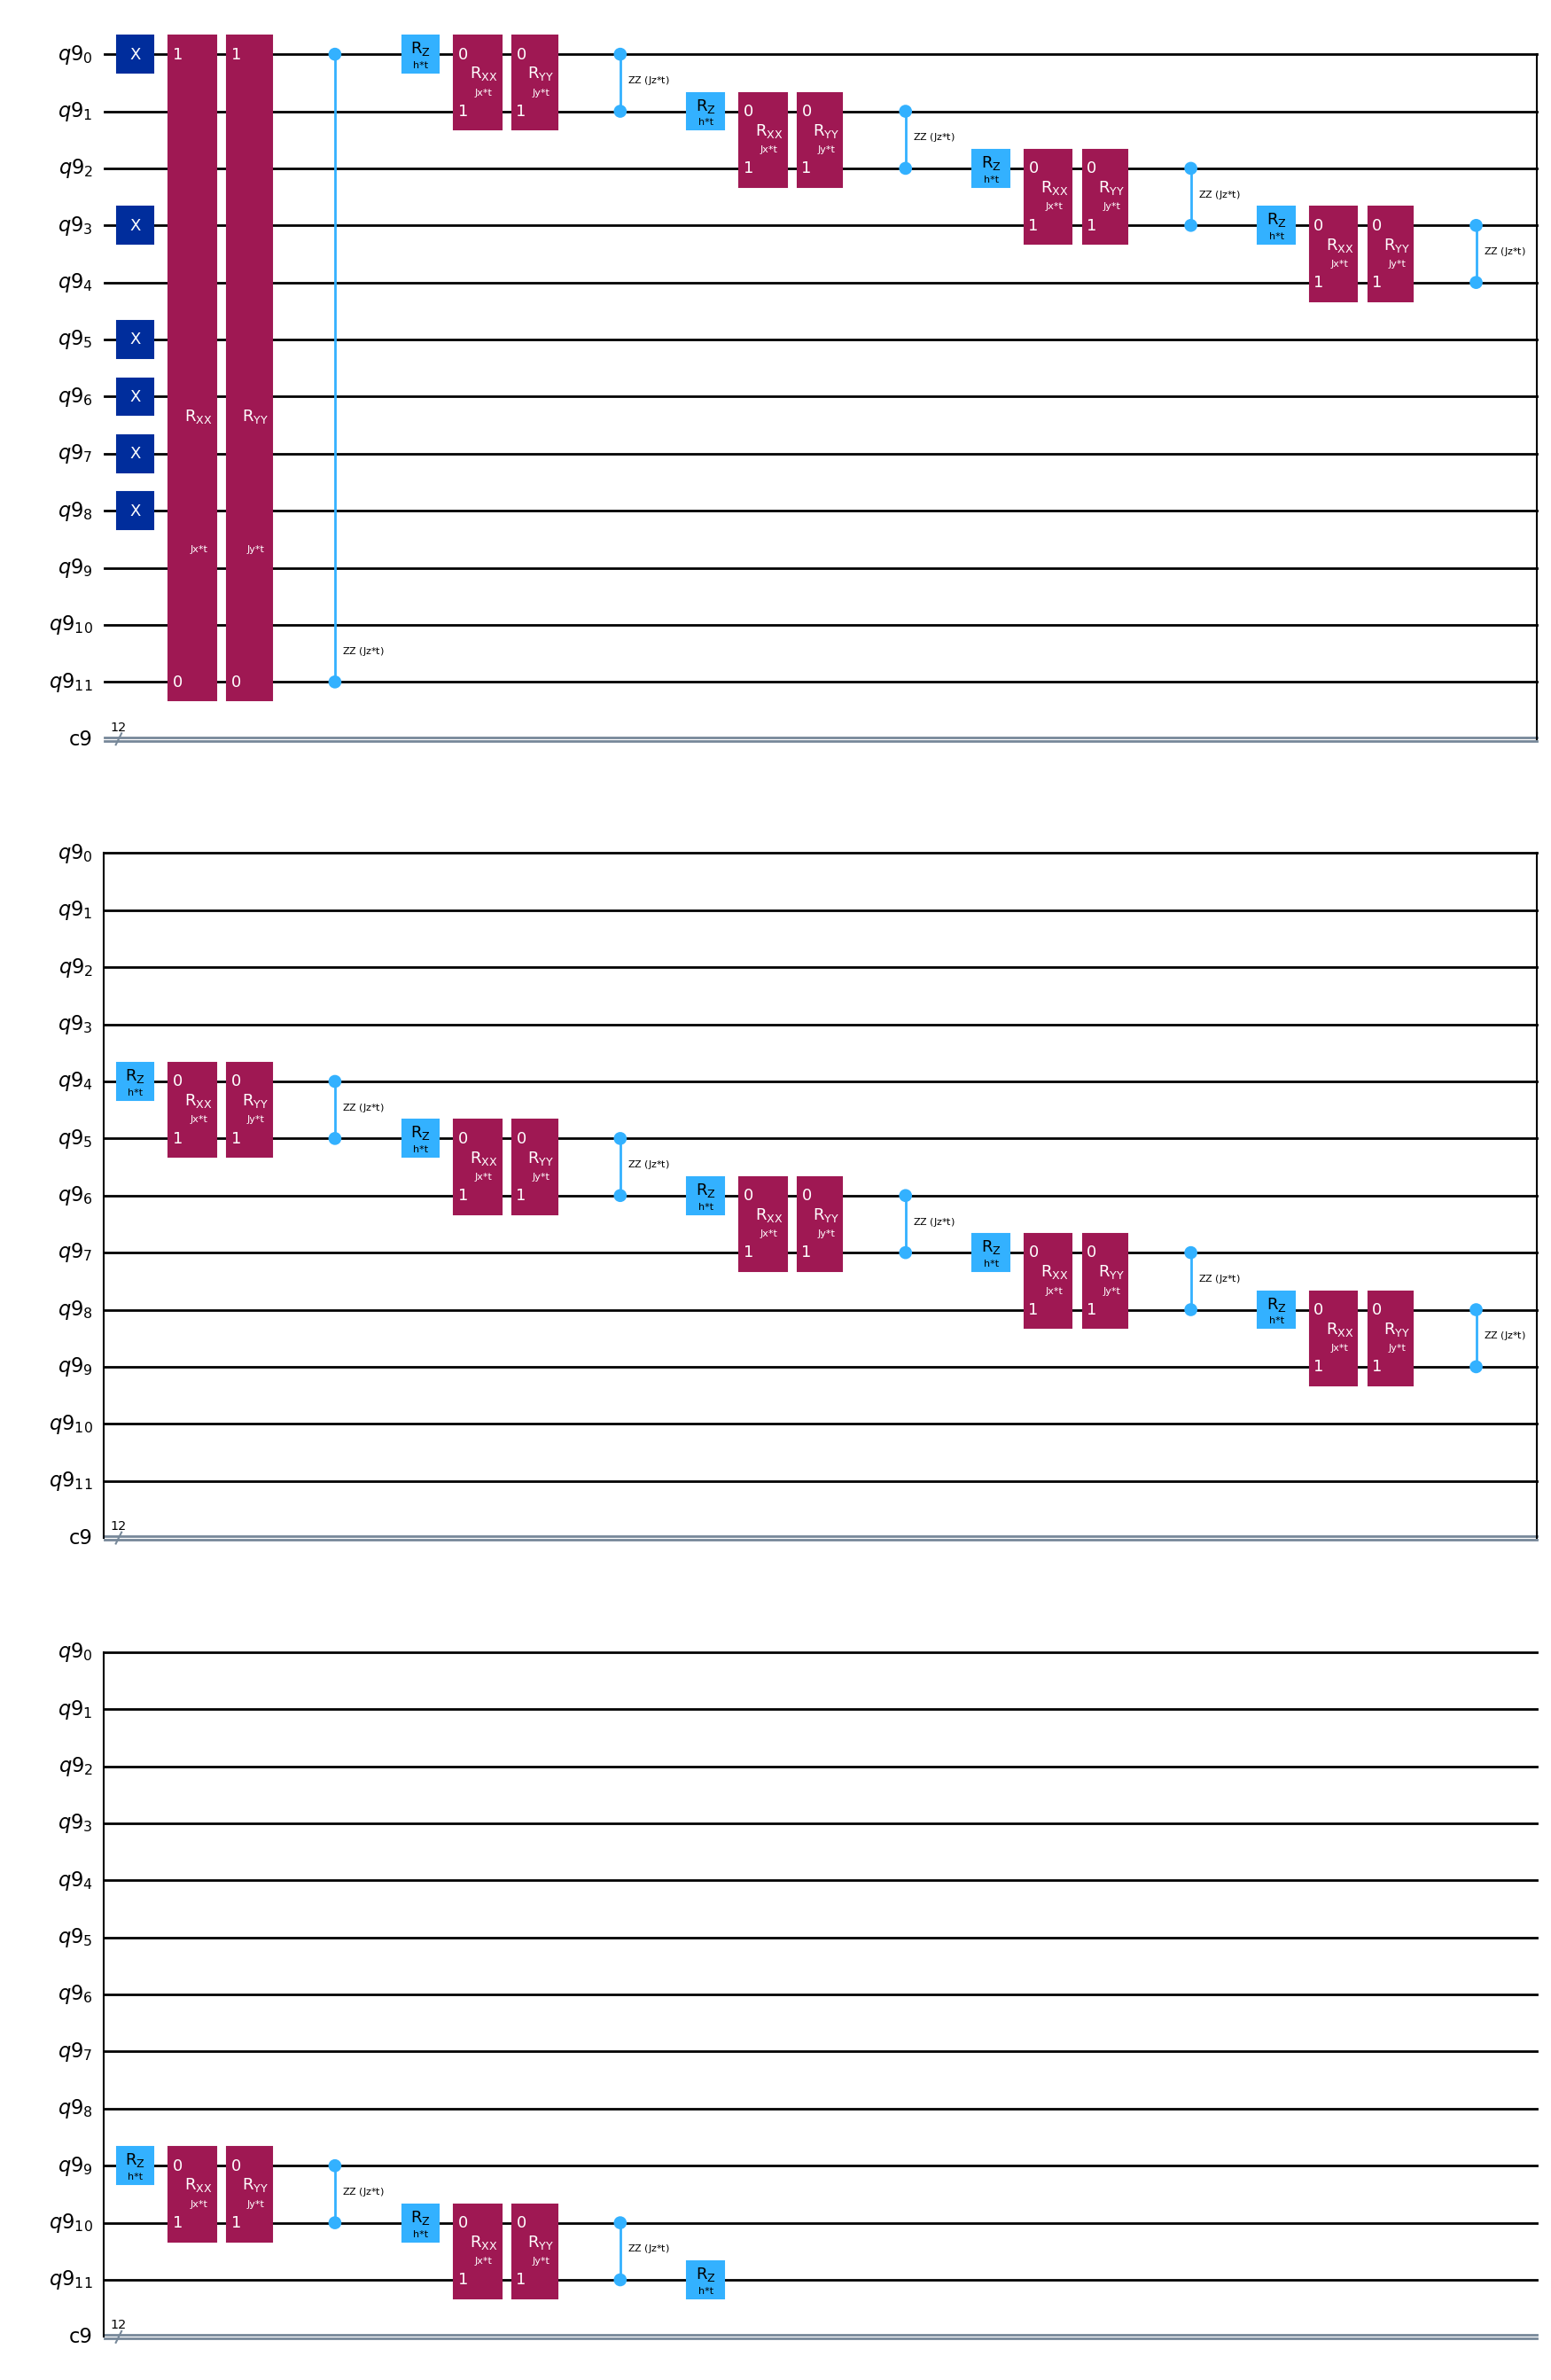

In [39]:
heisen_circ.draw('mpl', style='iqp')

## Transpiling the Circuit

We will now use 